In [2]:
import pandas as pd
import numpy as np

from scipy.linalg import eigh, cholesky
from scipy.stats import norm


from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
%matplotlib inline

# Introduction

This notebook creates tables for Patients, Encounters, and Diagnosis Codes for Example Projects part 1 (Chapter 4) and Part 2 (Chapter 17).

## Patients

## Population 1

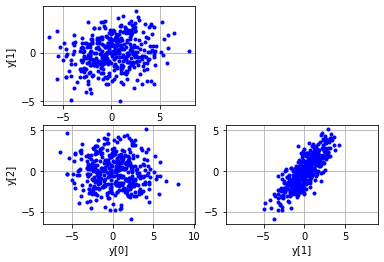

In [60]:
# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 400

# The desired covariance matrix.
# y0 = age
# y1 = num diagnoses
# y2 = visit duration (minutes)


r = np.array([
        [  6.00,  0.75, -0.25],
        [ 0.75,  2.50,  2.50],
        [ -0.25,  2.50,  4.00]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

#
# Plot various projections of the samples.
#
subplot(2,2,1)
plot(y[0], y[1], 'b.')
ylabel('y[1]')
axis('equal')
grid(True)

subplot(2,2,3)
plot(y[0], y[2], 'b.')
xlabel('y[0]')
ylabel('y[2]')
axis('equal')
grid(True)

subplot(2,2,4)
plot(y[1], y[2], 'b.')
xlabel('y[1]')
axis('equal')
grid(True)

show()

In [61]:
# y0 = age
# y1 = num diagnoses
# y3 = visit duration (minutes)

ages_pop_1 = y[0] + 50
num_dx_pop_1 = y[1] + abs(y[1].min())
visit_minutes_pop_1 = y[2] + 30

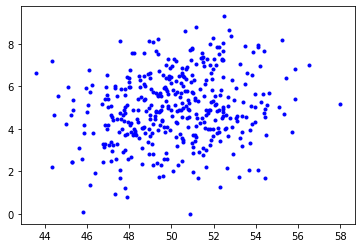

In [69]:
plot(ages_pop_1, num_dx_pop_1, 'b.')

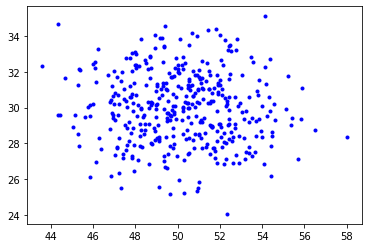

In [70]:
plot(ages_pop_1, visit_minutes_pop_1, 'b.')

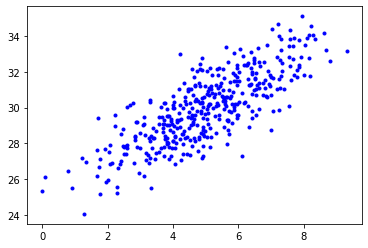

In [71]:
plot(num_dx_pop_1, visit_minutes_pop_1, 'b.')

## Population 2

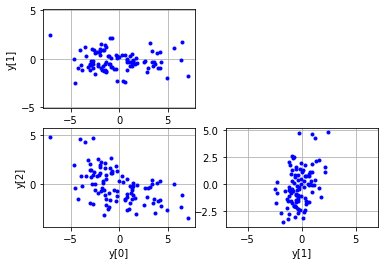

In [74]:
# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 100

# The desired covariance matrix.
# y0 = age
# y1 = num diagnoses
# y2 = visit duration (minutes)


r = np.array([
        [  6.00,  -1.5, -0.5],
        [ 0.0,  1.00,  0.50],
        [ -1.5,  0.50,  2.50]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

#
# Plot various projections of the samples.
#
subplot(2,2,1)
plot(y[0], y[1], 'b.')
ylabel('y[1]')
axis('equal')
grid(True)

subplot(2,2,3)
plot(y[0], y[2], 'b.')
xlabel('y[0]')
ylabel('y[2]')
axis('equal')
grid(True)

subplot(2,2,4)
plot(y[1], y[2], 'b.')
xlabel('y[1]')
axis('equal')
grid(True)

show()

In [75]:
ages_pop_2 = y[0] + abs(y[0].min())
num_dx_pop_2 = y[1] + abs(y[1].min())
visit_minutes_pop_2 = y[2] + 30

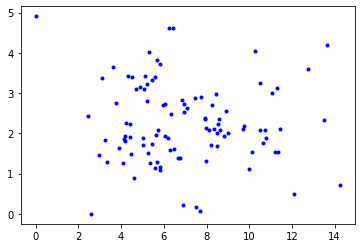

In [76]:
plot(ages_pop_2, num_dx_pop_2, 'b.')

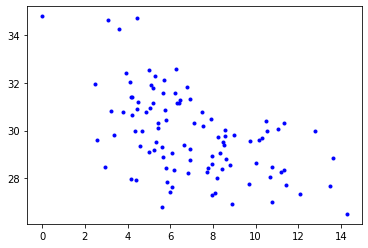

In [77]:
plot(ages_pop_2, visit_minutes_pop_2, 'b.')

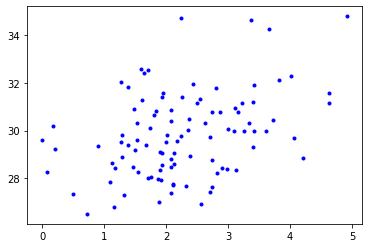

In [78]:
plot(num_dx_pop_2, visit_minutes_pop_2, 'b.')

## Build Patient Table

In [90]:
patients_df = pd.DataFrame(data={'age':np.append(ages_pop_1,ages_pop_2).astype(int), 
                   'num_dx':np.append(num_dx_pop_1,num_dx_pop_2).astype(int), 
                   'visit_minutes':np.append(visit_minutes_pop_1,visit_minutes_pop_2).astype(int)})

def label_duration(row):
    if row['visit_minutes'] <= 30:
        return 'short'
    elif row['visit_minutes'] > 30:
        return 'long'
    
patients_df['visit_class'] = patients_df.apply(lambda row: label_duration(row), axis=1)

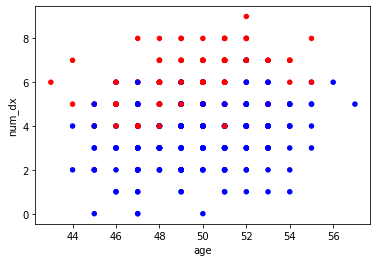

In [91]:
color_dict = {'long': '#FF0000', 'short': '#0000FF'}

patients_df = patients_df[patients_df['age']>40]
patients_df.plot.scatter(x='age', y='num_dx', 
                         c=[color_dict[x] for x in patients_df['visit_class'].values])